In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [10]:
data = pd.read_csv('D:/Credit Card Customer Data.csv') 

In [3]:
# Heading for the dataset
dataset_heading = """
<h1 style="color: #4A90E2; font-family: 'Arial Black', sans-serif; font-weight: bold; font-size: 50px; text-align: center; background-color: black; padding: 20px; border-bottom: 3px solid #4A90E2;">
    Credit Card Customer Data
</h1>
"""

# To display the heading in a Jupyter Notebook
from IPython.core.display import display, HTML
display(HTML(dataset_heading))


C:\Users\nemo\AppData\Local\Temp\ipykernel_23936\2381101310.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [4]:
dataset_description = """
<h1 style="color: #4A90E2; font-family: 'Arial Black', sans-serif; font-weight: bold; font-size: 50px; text-align: center; background-color: black; padding: 20px; border-bottom: 3px solid #4A90E2;">
    Credit Card Customer Data Overview
</h1>
<p style="font-size: 18px; color: #333333; font-family: 'Arial', sans-serif; text-align: left; line-height: 1.6;">
    The "Credit Card Customer Data" dataset provides a comprehensive examination of various customer demographics and financial behaviors relevant to the credit card industry. As financial institutions strive to enhance their offerings and cater to diverse customer needs, this dataset serves as a vital tool for analysis and strategic decision-making. The dataset consists of several key attributes:
    <br><br>
    <strong>Customer ID:</strong> A unique identifier assigned to each customer.<br>
    <strong>Age:</strong> Represents the customer's age, facilitating demographic analysis.<br>
    <strong>Gender:</strong> The customer's gender, useful for understanding gender-based financial trends.<br>
    <strong>Income:</strong> The annual income level of the customer, impacting credit limits and spending behavior.<br>
    <strong>Credit Limit:</strong> The maximum credit available to the customer, critical for assessing financial behavior.<br>
    <strong>Monthly Payment:</strong> The total payment made by the customer each month, which provides insight into payment practices.<br>
    <strong>Outstanding Balance:</strong> The current remaining balance on the credit card, indicating financial health and usage patterns.<br>
    <strong>Payment History:</strong> Documentation of the customer's payment habits, essential for evaluating reliability and credit risk.<br>
    <strong>Credit Card Type:</strong> Specifies the category of credit card held, influencing customer loyalty and spending behavior.<br><br>
    This dataset is particularly useful for analyzing trends in credit card usage, examining customer payment behaviors, and generating insights that can lead to enhanced risk management and tailored marketing strategies.
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-weight: bold; font-size: 30px; text-align: left; padding: 10px;">
    Dataset Statistics
</h3>
<ul style="font-size: 18px; color: #333333; font-family: 'Arial', sans-serif; text-align: left;">
    <li><strong>Total number of Columns in Dataset:</strong> 12</li>
    <li><strong>Total number of Rows in Dataset:</strong> 8807</li>
    <li><strong>Number of Unique Credit Card Types:</strong> 4</li>
    <li><strong>Number of Unique Payment Status:</strong> 2</li>
</ul>
"""

# To display the HTML in a Jupyter Notebook
from IPython.core.display import display, HTML
display(HTML(dataset_description))


C:\Users\nemo\AppData\Local\Temp\ipykernel_23936\3074722663.py:32: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [5]:
segment_1_heading = """
<h2 style="color: #4A90E2; font-family: 'Arial Black', sans-serif; font-weight: bold; font-size: 40px; text-align: center; background-color: black; padding: 15px; border-bottom: 2px solid #4A90E2;">
 Customer Demographics
</h2>
"""

# To display the heading in a Jupyter Notebook
from IPython.core.display import display, HTML
display(HTML(segment_1_heading))


C:\Users\nemo\AppData\Local\Temp\ipykernel_23936\3715005800.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


C:\Users\nemo\AppData\Local\Temp\ipykernel_23936\1778703297.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Average Credit Limit', data=avg_limits_df, palette='Set2')


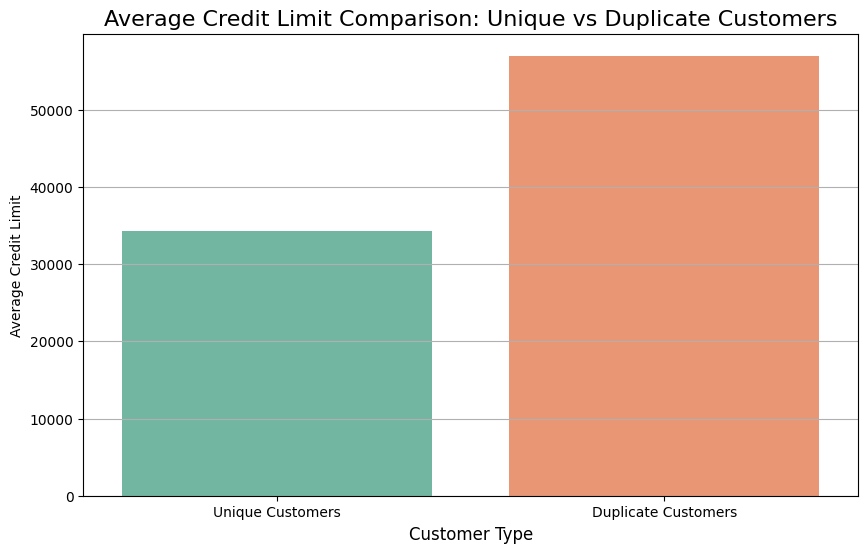

Average Credit Limit for Unique Customers: 34242.75
Average Credit Limit for Duplicate Customers: 57000.00


In [52]:

# Identify unique customers and calculate their average credit limit
unique_customers = data.drop_duplicates(subset='Customer Key')  # Unique records based on Customer Key
unique_avg_credit_limit = unique_customers['Avg_Credit_Limit'].mean()

# Identify duplicate customers and calculate their average credit limit
duplicate_customers = data[data.duplicated(subset='Customer Key', keep=False)]  # All duplicates
duplicate_avg_credit_limit = duplicate_customers.groupby('Customer Key')['Avg_Credit_Limit'].mean().mean()

# Prepare data for plotting
avg_limits = {
    'Type': ['Unique Customers', 'Duplicate Customers'],
    'Average Credit Limit': [unique_avg_credit_limit, duplicate_avg_credit_limit]
}

avg_limits_df = pd.DataFrame(avg_limits)

# Plotting the average credit limits
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Average Credit Limit', data=avg_limits_df, palette='Set2')
plt.title('Average Credit Limit Comparison: Unique vs Duplicate Customers', fontsize=16)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Average Credit Limit', fontsize=10)
plt.grid(axis='y')
plt.show()

# Print the average values for verification
print(f"Average Credit Limit for Unique Customers: {unique_avg_credit_limit:.2f}")
print(f"Average Credit Limit for Duplicate Customers: {duplicate_avg_credit_limit:.2f}")



Average Credit Limit for Unique Customers: 34403.05
Overall Average Credit Limit (including duplicates): 34574.24


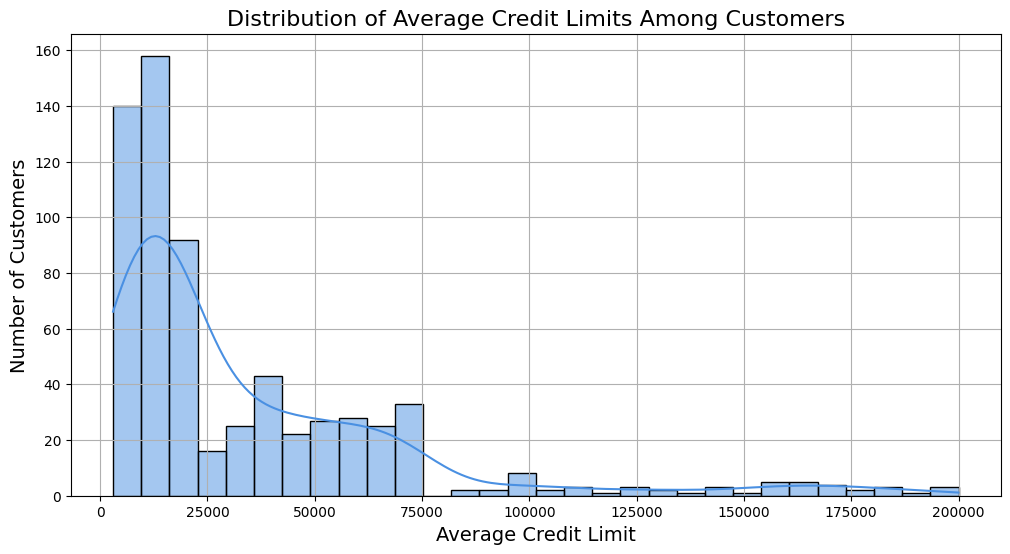

In [50]:

#the average credit limit for all customers, distinguishing between unique customers and duplicates.

# Calculate average credit limit for unique customers
unique_avg_credit_limit = data.groupby('Customer Key')['Avg_Credit_Limit'].mean().reset_index()

# Overall average credit limit (including duplicates)
overall_avg_credit_limit = data['Avg_Credit_Limit'].mean()

# Print the average values
print(f"Average Credit Limit for Unique Customers: {unique_avg_credit_limit['Avg_Credit_Limit'].mean():.2f}")
print(f"Overall Average Credit Limit (including duplicates): {overall_avg_credit_limit:.2f}")

# Plotting the distribution of average credit limits
plt.figure(figsize=(12, 6))
sns.histplot(data['Avg_Credit_Limit'], bins=30, kde=True, color='#4A90E2')
plt.title('Distribution of Average Credit Limits Among Customers', fontsize=16)
plt.xlabel('Average Credit Limit', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(True)
plt.show()


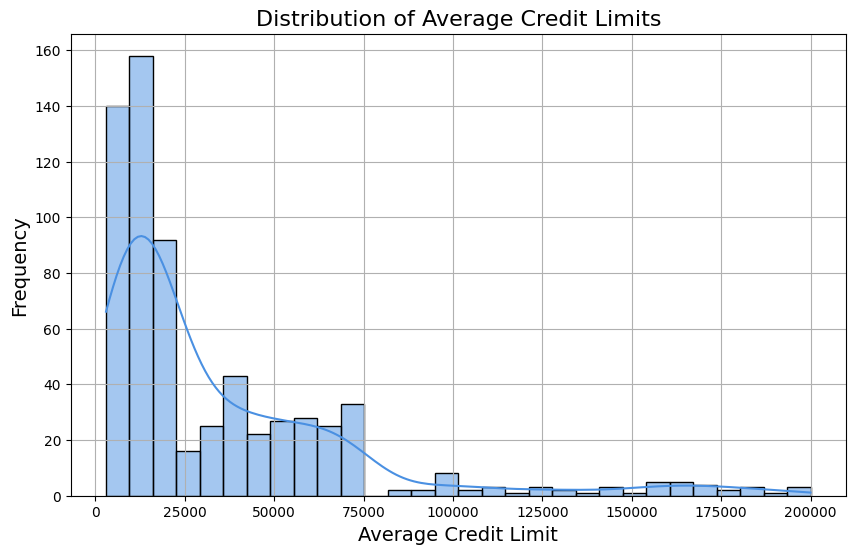

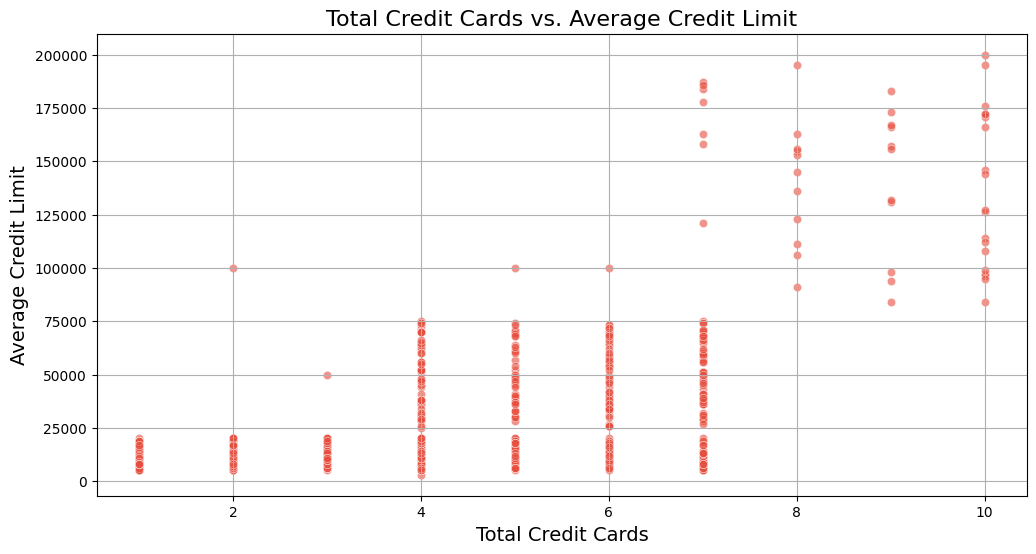

In [15]:
# total credit cards held correlate with average credit limits
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Credit_Cards', y='Avg_Credit_Limit', data=data, color='#E74C3C', alpha=0.6)  # Using a strong color to highlight points
plt.title('Total Credit Cards vs. Average Credit Limit', fontsize=16)
plt.xlabel('Total Credit Cards', fontsize=14)
plt.ylabel('Average Credit Limit', fontsize=14)
plt.grid(True)
plt.show()


C:\Users\nemo\AppData\Local\Temp\ipykernel_23936\1440388966.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Visits_Bin', y='Avg_Credit_Limit', data=data, palette='viridis')


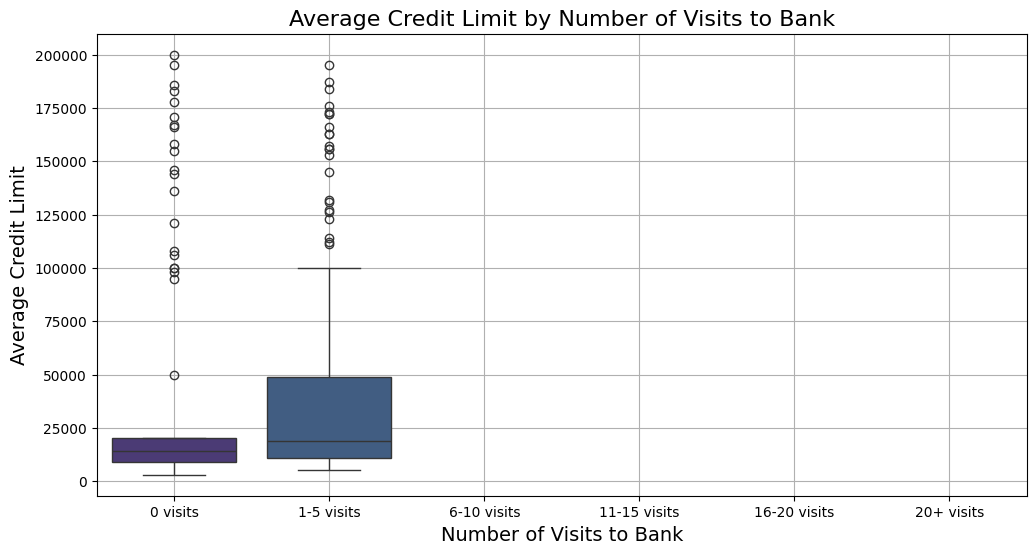

In [17]:
# Total Visits to the Bank and Average Credit Limits
plt.figure(figsize=(12, 6))

# Creating bins for Total Visits to Bank for better visualization
data['Visits_Bin'] = pd.cut(data['Total_visits_bank'], bins=[-1, 0, 5, 10, 15, 20, float('inf')], 
                            labels=['0 visits', '1-5 visits', '6-10 visits', '11-15 visits', '16-20 visits', '20+ visits'])

# Box plot to show the distribution of Average Credit Limit by visits to the bank
sns.boxplot(x='Visits_Bin', y='Avg_Credit_Limit', data=data, palette='viridis')
plt.title('Average Credit Limit by Number of Visits to Bank', fontsize=16)
plt.xlabel('Number of Visits to Bank', fontsize=14)
plt.ylabel('Average Credit Limit', fontsize=14)
plt.grid(True)
plt.show()



C:\Users\nemo\AppData\Local\Temp\ipykernel_23936\4132696556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Total_Credit_Cards', y='Total_calls_made', data=data, palette='pastel')  # Using pastel colors for clarity


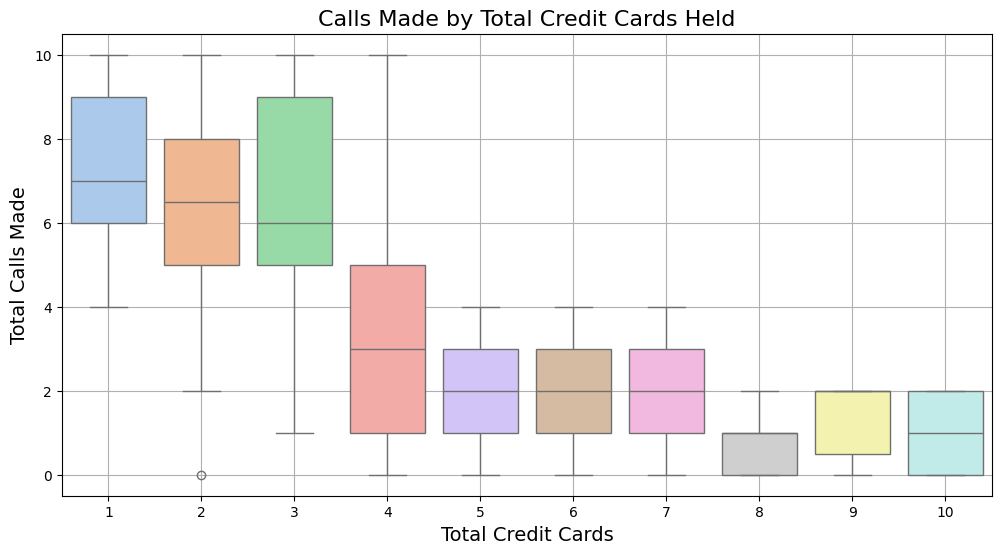

In [18]:
#Average Number of Calls Made by Customers with Different Total Credit Card Holdings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Total_Credit_Cards', y='Total_calls_made', data=data, palette='pastel')  # Using pastel colors for clarity
plt.title('Calls Made by Total Credit Cards Held', fontsize=16)
plt.xlabel('Total Credit Cards', fontsize=14)
plt.ylabel('Total Calls Made', fontsize=14)
plt.grid(True)
plt.show()


In [53]:
segment_2_heading = """
<h2 style="color: #4A90E2; font-family: 'Arial Black', sans-serif; font-weight: bold; font-size: 40px; text-align: center; background-color: black; padding: 15px; border-bottom: 2px solid #4A90E2;">
 Financial Behaviors
</h2>
"""

# To display the heading in a Jupyter Notebook
from IPython.core.display import display, HTML
display(HTML(segment_2_heading))


C:\Users\nemo\AppData\Local\Temp\ipykernel_23936\1561931651.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


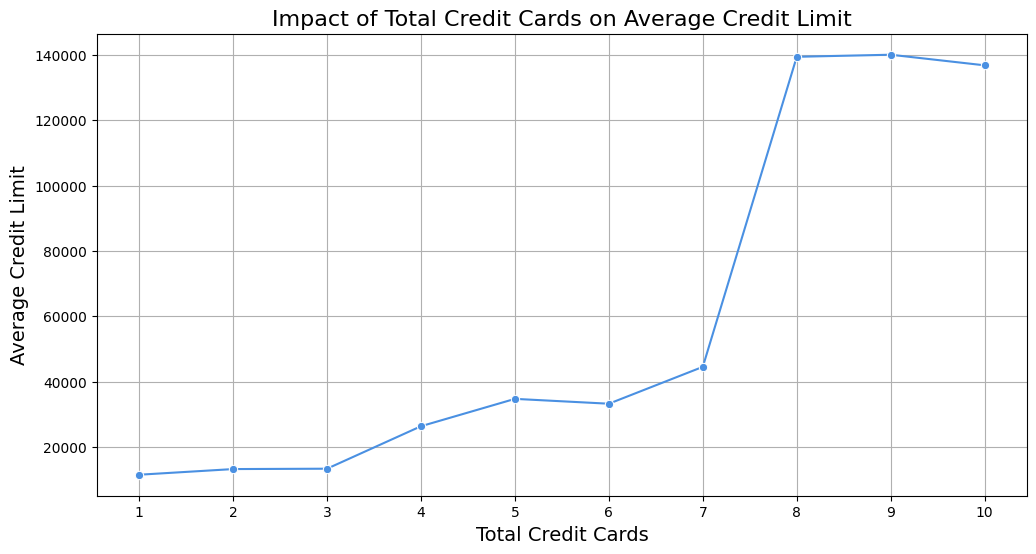

In [30]:
# Impact of Total Credit Cards on Average Credit Limit
plt.figure(figsize=(12, 6))
mean_credit_limits = data.groupby('Total_Credit_Cards')['Avg_Credit_Limit'].mean().reset_index()
sns.lineplot(x='Total_Credit_Cards', y='Avg_Credit_Limit', data=mean_credit_limits, marker='o', color='#4A90E2')
plt.title('Impact of Total Credit Cards on Average Credit Limit', fontsize=16)
plt.xlabel('Total Credit Cards', fontsize=14)
plt.ylabel('Average Credit Limit', fontsize=14)
plt.xticks(mean_credit_limits['Total_Credit_Cards'])
plt.grid(True)
plt.show()






C:\Users\nemo\AppData\Local\Temp\ipykernel_23936\1754271511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_visits_online', y='Avg_Credit_Limit', data=data, palette='Blues')


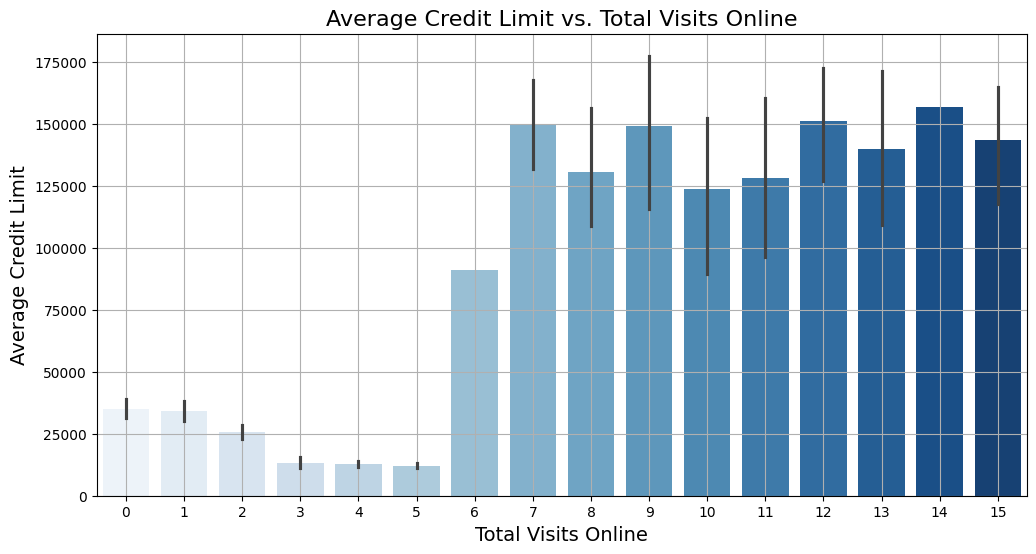

In [32]:
#Average Credit Limits Based on Total Online Visits
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_visits_online', y='Avg_Credit_Limit', data=data, palette='Blues')
plt.title('Average Credit Limit vs. Total Visits Online', fontsize=16)
plt.xlabel('Total Visits Online', fontsize=14)
plt.ylabel('Average Credit Limit', fontsize=14)
plt.grid(True)
plt.show()


C:\Users\nemo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nemo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


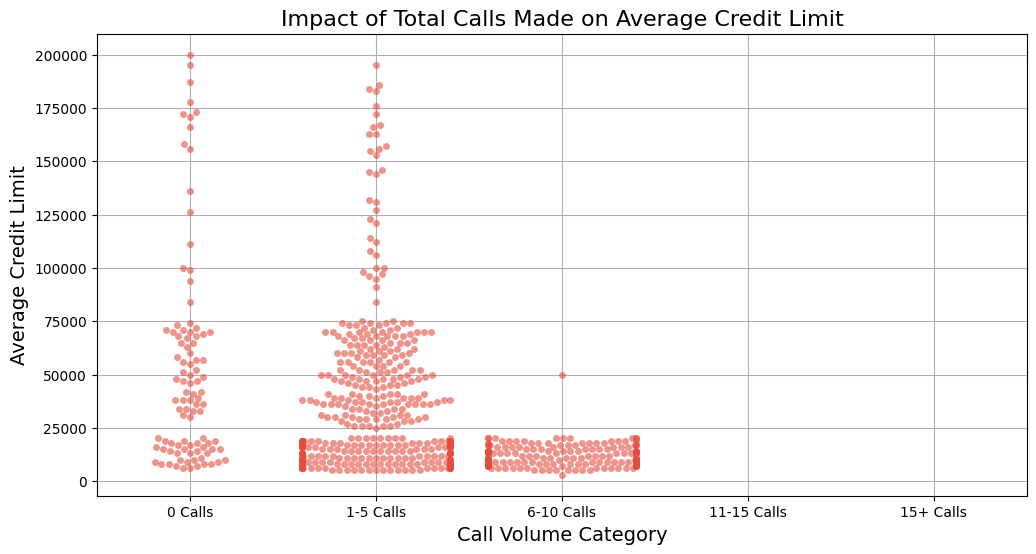

In [38]:
## Impact of Total Calls Made on Average Credit Limit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame Creation (Uncomment and modify according to your actual dataset)
# data = pd.read_csv(r'C:\Users\nemo\Downloads\Credit Card Customer Data.csv')

# Categorizing Total Calls Made into bins
data['Call_Category'] = pd.cut(data['Total_calls_made'], 
                                bins=[-1, 0, 5, 10, 15, float('inf')], 
                                labels=['0 Calls', '1-5 Calls', '6-10 Calls', '11-15 Calls', '15+ Calls'])

# Creating the swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Call_Category', y='Avg_Credit_Limit', data=data, color='#E74C3C', alpha=0.6)
plt.title('Impact of Total Calls Made on Average Credit Limit', fontsize=16)
plt.xlabel('Call Volume Category', fontsize=14)
plt.ylabel('Average Credit Limit', fontsize=14)
plt.grid(True)
plt.show()


In [40]:
segment_3_heading = """
<h2 style="color: #4A90E2; font-family: 'Arial Black', sans-serif; font-weight: bold; font-size: 40px; text-align: center; background-color: black; padding: 15px; border-bottom: 2px solid #4A90E2;">
 Payment Patterns
</h2>
"""

# To display the heading in a Jupyter Notebook
from IPython.core.display import display, HTML
display(HTML(segment_3_heading))


C:\Users\nemo\AppData\Local\Temp\ipykernel_23936\1835010997.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


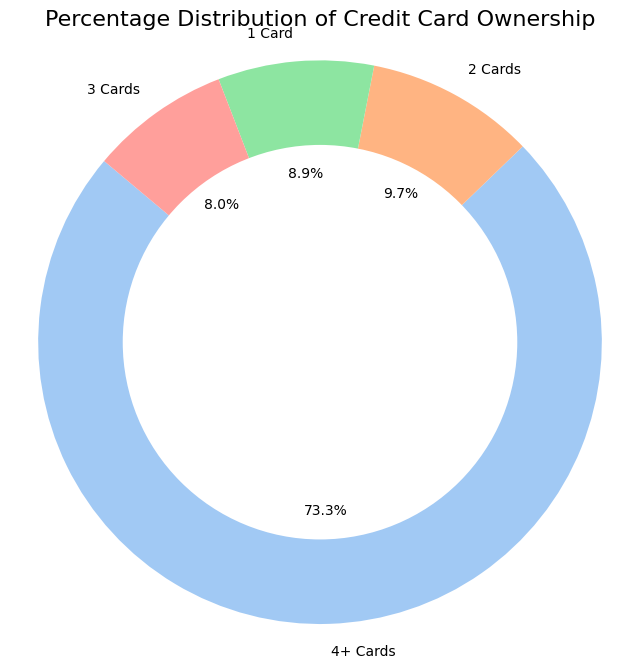

In [41]:
#Number of Bank Visits for High Credit Card Ownership
# Categorizing Card Ownership
data['Card_Ownership'] = pd.cut(data['Total_Credit_Cards'], 
                                 bins=[0, 1, 2, 3, float('inf')], 
                                 labels=['1 Card', '2 Cards', '3 Cards', '4+ Cards'])

# Create a summary for the donut chart
card_ownership_counts = data['Card_Ownership'].value_counts()

# Pie Chart for Donut representation
plt.figure(figsize=(8, 8))
plt.pie(card_ownership_counts, labels=card_ownership_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
centre_circle = plt.Circle((0,0),0.70,fc='white')  # Create a circle for the donut effect
fig = plt.gcf()
fig.gca().add_artist(centre_circle)  # Add the circle to the pie chart
plt.title('Percentage Distribution of Credit Card Ownership', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


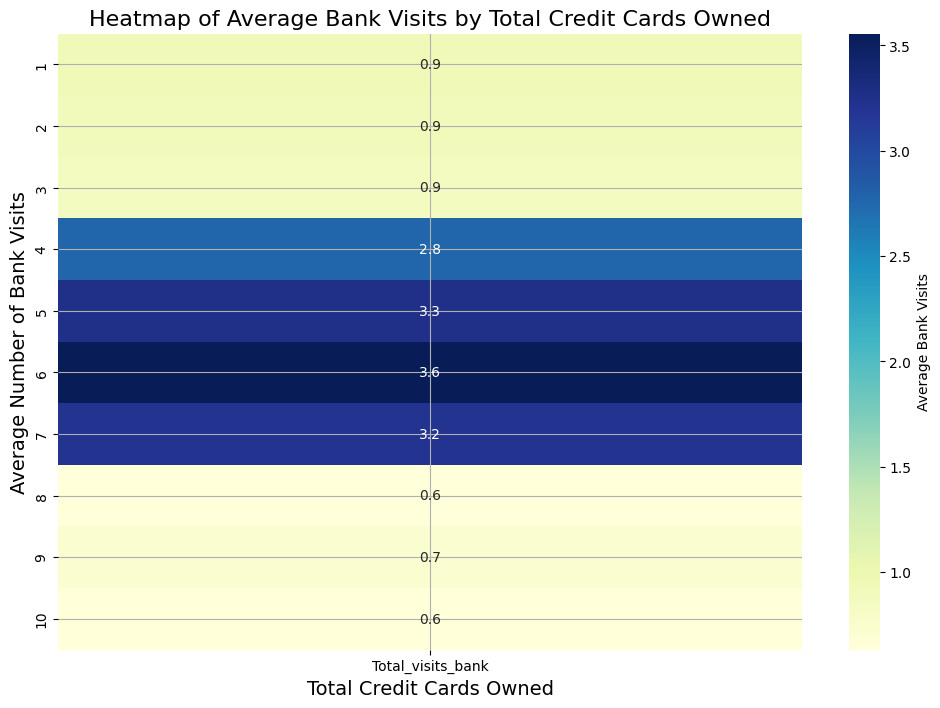

In [45]:
#Average Number of Bank Visits for Customers with High Total Credit Card Ownership
# Create a pivot table for the heatmap
pivot_table = data.pivot_table(values='Total_visits_bank', 
                                 index='Total_Credit_Cards', 
                                 aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Average Bank Visits'})
plt.title('Heatmap of Average Bank Visits by Total Credit Cards Owned', fontsize=16)
plt.xlabel('Total Credit Cards Owned', fontsize=14)
plt.ylabel('Average Number of Bank Visits', fontsize=14)
plt.grid(True)
plt.show()




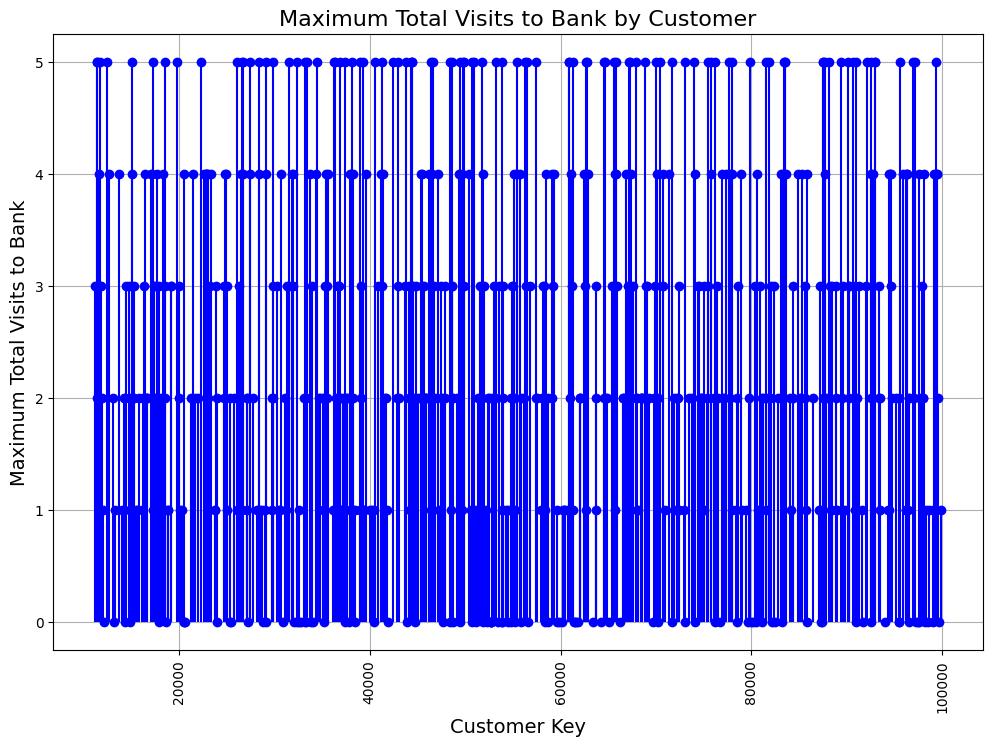

In [48]:
# Find the maximum visits to the bank for each customer
# Find the maximum visits to the bank for each customer
max_visits = data.groupby('Customer Key')['Total_visits_bank'].max().reset_index()

# Sort the data for better visualization
max_visits = max_visits.sort_values(by='Total_visits_bank', ascending=False)

plt.figure(figsize=(12, 8))
plt.stem(max_visits['Customer Key'], max_visits['Total_visits_bank'], linefmt='-b', markerfmt='ob', basefmt=" ")
plt.title('Maximum Total Visits to Bank by Customer', fontsize=16)
plt.xlabel('Customer Key', fontsize=14)
plt.ylabel('Maximum Total Visits to Bank', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
